In [46]:
import numpy as np
import pandas as pd
import datetime as dt

In [47]:
sales=pd.read_csv("Sales data.csv")

In [104]:
p_sales=sales.pivot_table(index=["Product line"], columns=["City"], values="Quantity", aggfunc=np.count_nonzero)
p_sales

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,55,55,60
Fashion accessories,62,65,51
Food and beverages,50,66,58
Health and beauty,53,52,47
Home and lifestyle,50,45,65
Sports and travel,62,45,59


In [105]:
p_sales.to_excel("P_Sales Data(1).xlsx")

In [49]:
display(sales.head(5))

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37,Ewallet,604.17,5.3


In [50]:
#structrue
display(sales.shape)

(1000, 15)

In [51]:
#summary of basic stats
display(sales.describe())

,Unit price,Quantity,Tax 5%,Total,cogs,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,10.00000


In [52]:
#type of each column
display(sales.dtypes)

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Time              object
Payment           object
cogs             float64
Rating           float64
dtype: object

In [53]:
sales.isnull().sum()
#total sum of null values in each column

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
Rating           0
dtype: int64

In [54]:
df = sales.dropna() 
#update by removing null rows

In [55]:
#total branches and there sales
branch_A=sales[sales["Branch"]=="A"]
branch_B=sales[sales["Branch"]=="B"]
branch_C=sales[sales["Branch"]=="C"]



In [56]:
branch_A['Total'].groupby([df['Date']]).sum()


Date
01-01-19     474.264000
01-02-19     153.525750
01-03-19     312.469500
01-04-19     241.631250
01-05-19     404.901000
                ...    
3/26/2019    197.890000
3/27/2019    212.125200
3/28/2019    275.488500
3/29/2019    488.806500
3/30/2019    330.154125
Name: Total, Length: 89, dtype: float64

In [57]:
males=sales[sales["Gender"]=="Male"]
female=sales[sales["Gender"]=="Female"]

In [58]:
non_member=sales[sales["Customer type"]!="Member"]
member=sales[sales["Customer type"]=="Member"]

In [59]:
cash=sales[sales["Payment"]=="Cash"]
non_cash=sales[sales["Payment"]!="Cash"]

In [60]:
good_products=sales[sales["Rating"]>8]
ok_products=sales[list(sales["Rating"]>5) and list(sales["Rating"]<8)]
bad_products=sales[(sales["Rating"]<5)]


In [61]:
unique_values = sales['Product line'].nunique()
print("Total types of product lines:",unique_values)

Total types of product lines: 6


In [62]:
"""goods=list(sales["Product line"])
products={}
count=0
for i in sales["Product line"]:
    if i in goods:
        products[i]=0
for i in sales["Product line"]:
    if i in products:
        products[i]=count
        count+=1
    else:
        count=0
products"""

'goods=list(sales["Product line"])\nproducts={}\ncount=0\nfor i in sales["Product line"]:\n    if i in goods:\n        products[i]=0\nfor i in sales["Product line"]:\n    if i in products:\n        products[i]=count\n        count+=1\n    else:\n        count=0\nproducts'

In [63]:
df = sales

In [64]:
# which product was ordered the most
sale_frequency = df["Product line"].value_counts()
sale_frequency


Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [65]:
# which city ordered the most overall
cities = df["City"].value_counts()
cities

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [66]:
# find different customer types
customer_type = df["Customer type"].value_counts()
customer_type

Member    501
Normal    499
Name: Customer type, dtype: int64

In [67]:
# seperate genders
genders = df["Gender"].value_counts()
genders

Female    501
Male      499
Name: Gender, dtype: int64

In [68]:
# classify payment modes
payment_modes = df["Payment"].value_counts()
payment_modes

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [69]:
# which city gave good reviews
good_products["City"].value_counts()

Naypyitaw    113
Yangon       106
Mandalay      89
Name: City, dtype: int64

In [70]:
# which city gave bad reviews
bad_products["City"].value_counts()

Mandalay     59
Yangon       52
Naypyitaw    42
Name: City, dtype: int64

In [71]:
#number of products with good reviews
good_products["Product line"].value_counts()

Food and beverages        60
Fashion accessories       57
Health and beauty         53
Electronic accessories    49
Sports and travel         47
Home and lifestyle        42
Name: Product line, dtype: int64

In [72]:
# number of products with bad reviews
bad_products["Product line"].value_counts()

Home and lifestyle        31
Fashion accessories       27
Electronic accessories    26
Health and beauty         24
Food and beverages        24
Sports and travel         21
Name: Product line, dtype: int64

In [73]:
# Group by product and calculate total sales
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

# Sort by sales in descending order
top_selling_products = product_sales.sort_values(by='Total', ascending=False)

# most sale generated from
top_selling_products


,Product line,Total
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


In [74]:
monthly_sales = df.groupby(['Date', 'Time'])['Total'].sum().reset_index()
monthly_sales

,Date,Time,Total
0,01-01-19,10:39,457.443
1,01-01-19,11:36,888.615
2,01-01-19,11:40,184.086
3,01-01-19,11:43,132.027
4,01-01-19,13:55,621.243
...,...,...,...
989,3/30/2019,16:34,196.140
990,3/30/2019,17:04,338.310
991,3/30/2019,17:58,609.588
992,3/30/2019,19:26,609.168


In [75]:
df['Date'] = pd.to_datetime(df["Date"])
df.tail()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,6.6


In [76]:
sales_data=pd.read_csv(r'Sales data.csv', parse_dates=['Date'])
df["Month"]=sales_data['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,5.3,2


In [77]:
monthly_sales = df.groupby(['Date'])['Total'].sum().reset_index()
monthly_sale=df['Total'].groupby([df['Date']]).sum()
display(monthly_sale)
display(monthly_sales)


Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
                ...    
2019-03-26    1962.5130
2019-03-27    2902.8195
2019-03-28    2229.4020
2019-03-29    4023.2430
2019-03-30    4487.0595
Name: Total, Length: 89, dtype: float64

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835
...,...,...
84,2019-03-26,1962.5130
85,2019-03-27,2902.8195
86,2019-03-28,2229.4020
87,2019-03-29,4023.2430


In [78]:
display(df.groupby(pd.Grouper(key='Date', freq='M')).sum())
display(df.groupby(pd.Grouper(key='Date', freq='M')).mean())

display(df.groupby(pd.Grouper(key='Date', freq='M')).max())
display(df.groupby(pd.Grouper(key='Date', freq='M')).min())


,Unit price,Quantity,Tax 5%,Total,cogs,Rating,Month
Date,,,,,,,
2019-01-31,19753.89,1965,5537.708,116291.868,110754.16,2470.2,352
2019-02-28,17159.52,1654,4629.494,97219.374,92589.88,2142.6,606
2019-03-31,18758.72,1891,5212.167,109455.507,104243.34,2359.9,1035


,Unit price,Quantity,Tax 5%,Total,cogs,Rating,Month
Date,,,,,,,
2019-01-31,56.119006,5.582386,15.732125,330.374625,314.642500,7.017614,1.0
2019-02-28,56.632079,5.458746,15.278858,320.856020,305.577162,7.071287,2.0
2019-03-31,54.373101,5.481159,15.107730,317.262339,302.154609,6.840290,3.0


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,Month
Date,,,,,,,,,,,,,,,
2019-01-31,896-34-0956,C,Yangon,Normal,Male,Sports and travel,99.96,10,49.26,1034.46,20:59,Ewallet,985.2,9.9,1
2019-02-28,895-03-6665,C,Yangon,Normal,Male,Sports and travel,99.89,10,49.65,1042.65,20:51,Ewallet,993.0,10.0,2
2019-03-31,898-04-2717,C,Yangon,Normal,Male,Sports and travel,99.96,10,48.69,1022.49,20:57,Ewallet,973.8,10.0,3


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,Month
Date,,,,,,,,,,,,,,,
2019-01-31,101-81-4070,A,Mandalay,Member,Female,Electronic accessories,10.53,1,0.6045,12.6945,10:00,Cash,12.09,4.0,1
2019-02-28,105-10-6182,A,Mandalay,Member,Female,Electronic accessories,10.16,1,0.5085,10.6785,10:00,Cash,10.17,4.0,2
2019-03-31,101-17-6199,A,Mandalay,Member,Female,Electronic accessories,10.08,1,0.7750,16.2750,10:05,Cash,15.50,4.0,3


In [79]:
# mean sale in each month
df['Total'].groupby([df['Month']]).mean()

Month
1    330.374625
2    320.856020
3    317.262339
Name: Total, dtype: float64

In [80]:
#total sales in each month
df['Total'].groupby([df['Month']]).sum()


Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

In [81]:
(df['Rating'].groupby([df['Product line']]).mean())
# mean rating of each product

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [82]:
df['Unit price'].groupby([df['Product line']]).mean()
# mean price of each product

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [83]:
df['Total'].groupby([df['Product line']]).mean()
# max price of each product

Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64

<module 'matplotlib.pyplot' from 'C:\\Users\\AB\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

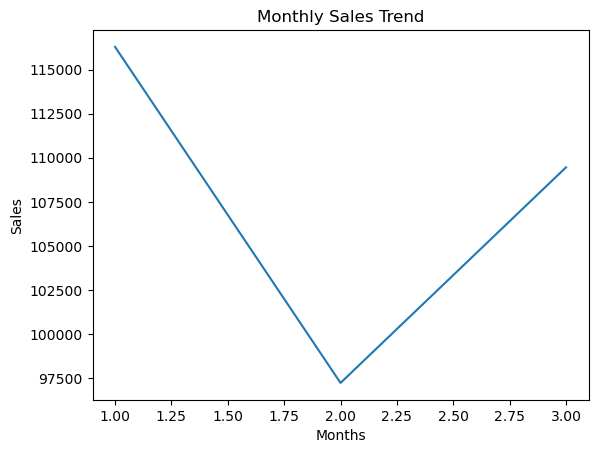

In [84]:



# Group by year and month, and calculate total sales
monthly_sales = df['Total'].groupby([df['Month']]).sum().reset_index()

# Plot sales trend over time
import matplotlib.pyplot as plt
plt.plot(monthly_sales['Month'], monthly_sales['Total'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt
